# <a id="inicio"></a> Exercícios Aprendizado Supervisionado 

-----

### **Autor:** Glauco Lauria Marques Filho

-----

# <a id="resumo"></a> Resumo 

#### Este arquivo contém a resolução dos exercícios da Aula 4 do curso CEDS-808: Aprendizado de Máquina. 

# <a id="sumario"></a> Sumário


* [Início](#inicio)
* [Resumo](#resumo)
* [Sumário](#sumario)
* [Importação de Requisitos](#requisitos)
1. [Dataset Breast Cancer Winconsin](#dataset)
- 1.a. [KNN](#knn)
- 1.b. [Naive  Bayes](#naive)
- 1.c. [Decision Tree](#dtree)
- 1.d. [Pre-processamento dos Dados](#prepro)
- 1.e. [KNN Pre-processado](#preknn)
- 1.f. [Naive  Bayes Pre-processado](#prenaive)
- 1.g. [Decision Tree Pre-processado](#predtree)
- 1.h. [Comparando Resultados](#resultados)


2. [Diferenças entre Algoritmos de Decision Tree](#difdt)

# <a id="requisitos"></a> Importação de Requisitos

In [400]:
from ucimlrepo import fetch_ucirepo # Biblioteca que possui os dados da base Breast Cancer Winconsin
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# <a id="dataset"></a> 1. Dataset Breast Cancer Winconsin

Utilizando o dataset Breast Cancer Winconsin para o exercício. Importando o dataset da biblioteca, e carregando dataframes de Features e Target.

In [401]:
# Importando o dataset Breast Cancer Winconsin
breast_c = fetch_ucirepo(id=17) 
# Definindo dataframe de Features e target
X = breast_c.data.features 
y = breast_c.data.targets

Pritando um pouco dos dataframes para uma primeira exploração da base de dados.

In [402]:
X.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [403]:
y.tail()

,Diagnosis
564,M
565,M
566,M
567,M
568,B


# <a id="knn"></a> 1.a. KNN

Nesse item iremos aplicar o algoritmo de KNN (vizinhos mais proximos) visto em aula.

In [404]:
# Dividindo o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Faremos uma modelagem primeiro variando os fatores K do KNN.

Acurácia média para k=1: 0.9142857142857143
Acurácia média para k=2: 0.9208791208791208


Acurácia média para k=3: 0.9208791208791208
Acurácia média para k=4: 0.9208791208791209
Acurácia média para k=5: 0.9230769230769231
Acurácia média para k=6: 0.9142857142857144
Acurácia média para k=7: 0.9252747252747252
Acurácia média para k=8: 0.9164835164835164
Acurácia média para k=9: 0.9274725274725274
Acurácia média para k=10: 0.9142857142857143
Acurácia média na validação cruzada: 0.9142857142857143
O valor de K com a maior acurácia é: 9 de 0.9274725274725274


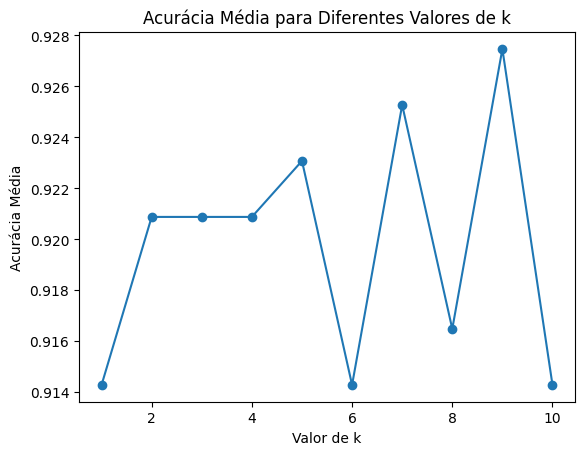

In [405]:
# Variando o parâmetro K
import numpy as np  # Importe numpy para usar a função ravel

# Listas para armazenar os resultados
k_values = list(range(1, 11))
KNN_accuracy_values = []

# Variação do valor de k de 1 a 10
for k_value in k_values:
    # Criando o modelo KNN
    knn_model = KNeighborsClassifier(n_neighbors=k_value)

    # Aplicando validação cruzada
    cross_val_scores = cross_val_score(knn_model, X_train, np.ravel(y_train), cv=5)

    # Calculando a acurácia média para o valor atual de k
    accuracy = cross_val_scores.mean()
    KNN_accuracy_values.append(accuracy)

    # Exibindo a acurácia média para k
    print(f'Acurácia média para k={k_value}: {accuracy}')

# Exibindo a acurácia média durante a validação cruzada
print(f'Acurácia média na validação cruzada: {cross_val_scores.mean()}')
max_accuracy= KNN_accuracy_values.index(max(KNN_accuracy_values))
best_k = k_values[max_accuracy]
best_accuracy = max(KNN_accuracy_values)

print(f"O valor de K com a maior acurácia é: {best_k} de {best_accuracy}")

# Criando o gráfico
plt.plot(k_values, KNN_accuracy_values, marker='o')
plt.title('Acurácia Média para Diferentes Valores de k')
plt.xlabel('Valor de k')
plt.ylabel('Acurácia Média')
plt.show()


Agora faremos uma modelagem variando os fatores K do KNN e tambem para diferentes metricas de distancia.

Acurácia média para k=1 e métrica=euclidean: 0.9142857142857143
Acurácia média para k=2 e métrica=euclidean: 0.9208791208791208
Acurácia média para k=3 e métrica=euclidean: 0.9208791208791208
Acurácia média para k=4 e métrica=euclidean: 0.9208791208791209
Acurácia média para k=5 e métrica=euclidean: 0.9230769230769231
Acurácia média para k=6 e métrica=euclidean: 0.9142857142857144
Acurácia média para k=7 e métrica=euclidean: 0.9252747252747252
Acurácia média para k=8 e métrica=euclidean: 0.9164835164835164
Acurácia média para k=9 e métrica=euclidean: 0.9274725274725274
Acurácia média para k=10 e métrica=euclidean: 0.9142857142857143
Acurácia média na validação cruzada: 0.9142857142857143
Acurácia média para k=1 e métrica=manhattan: 0.9362637362637363
Acurácia média para k=2 e métrica=manhattan: 0.9186813186813187
Acurácia média para k=3 e métrica=manhattan: 0.9252747252747253
Acurácia média para k=4 e métrica=manhattan: 0.9274725274725274
Acurácia média para k=5 e métrica=manhattan: 0.

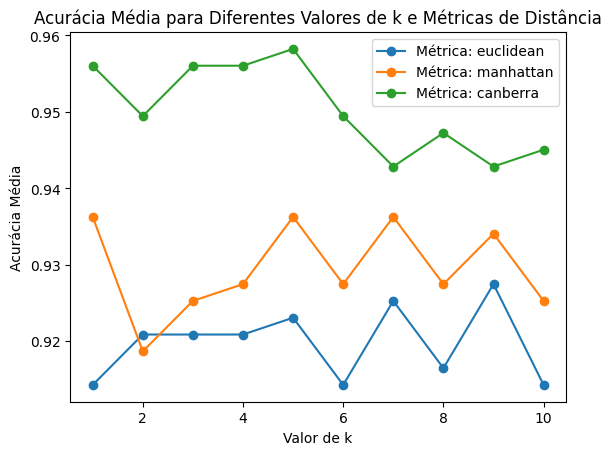

In [406]:
#................VARIANDO AS DISTÂNCIAS...............
# Listas para armazenar os resultados
distance_metrics = ['euclidean', 'manhattan', "canberra"]
accuracy_values = {metric: [] for metric in distance_metrics}

# Variação da função de distância
for metric in distance_metrics:
    # Variação do valor de k de 1 a 10
    for k_value in range(1, 11):
        # Criando o modelo KNN com a métrica de distância atual
        knn_model = KNeighborsClassifier(n_neighbors=k_value, metric=metric)

        # Aplicando validação cruzada
        cross_val_scores = cross_val_score(knn_model, X_train, np.ravel(y_train), cv=5)

        # Calculando a acurácia média para o valor atual de k e a métrica de distância
        accuracy = cross_val_scores.mean()
        accuracy_values[metric].append(accuracy)

        # Exibindo a acurácia média para k e a métrica de distância
        print(f'Acurácia média para k={k_value} e métrica={metric}: {accuracy}')

    # Exibindo a acurácia média durante a validação cruzada
    print(f'Acurácia média na validação cruzada: {cross_val_scores.mean()}')

# Criando o gráfico
for metric in distance_metrics:
    plt.plot(range(1, 11), accuracy_values[metric], marker='o', label=f'Métrica: {metric}')

plt.title('Acurácia Média para Diferentes Valores de k e Métricas de Distância')
plt.xlabel('Valor de k')
plt.ylabel('Acurácia Média')
plt.legend()
plt.show()

Tivemos uma media de acuracia maior utilizando um algoritmo de distancia que nao foi utilizado no exemplo dado em aula, o Canberra. A maior acuracio se da com k=5 e métrica=canberra: 0.9582417582417582.

# <a id="naive"></a> 1.b. Naive Bayes

Nesse item iremos aplicar o algoritmo de Naive Bayes visto em aula. Utilizaremos alguns modelos de Naive Bayes como o Gaussiano, Multinomial e outros modelos nao utilizados em aula como o Bernoulli e Complement.

In [407]:

gaussian_naive_bayes_model = GaussianNB()
multinomial_naive_bayes_model = MultinomialNB()
bernoulli_naive_bayes_model = BernoulliNB()
complement_naive_bayes_model = ComplementNB()


cv_scores_gaussian = cross_val_score(gaussian_naive_bayes_model, X, np.ravel(y), cv=5)
cv_scores_multinomial = cross_val_score(multinomial_naive_bayes_model, X, np.ravel(y), cv=5)
cv_scores_bernoulli = cross_val_score(bernoulli_naive_bayes_model, X, np.ravel(y), cv=5)
cv_scores_complement = cross_val_score(complement_naive_bayes_model, X, np.ravel(y), cv=5)

average_accuracy_gaussian = cv_scores_gaussian.mean()
average_accuracy_multinomial = cv_scores_multinomial.mean()
average_accuracy_bernoulli = cv_scores_bernoulli.mean()
average_accuracy_complement= cv_scores_complement.mean()


print(f'Acurácia média na validação cruzada (GaussianNB): {average_accuracy_gaussian}')
print(f'Acurácia média na validação cruzada (MultinomialNB): {average_accuracy_multinomial}')
print(f'Acurácia média na validação cruzada (BernoulliNB): {average_accuracy_bernoulli}')
print(f'Acurácia média na validação cruzada (ComplementNB): {average_accuracy_complement}')


Acurácia média na validação cruzada (GaussianNB): 0.9385188635305075
Acurácia média na validação cruzada (MultinomialNB): 0.8963204471355379
Acurácia média na validação cruzada (BernoulliNB): 0.6274181027790716
Acurácia média na validação cruzada (ComplementNB): 0.896320447135538


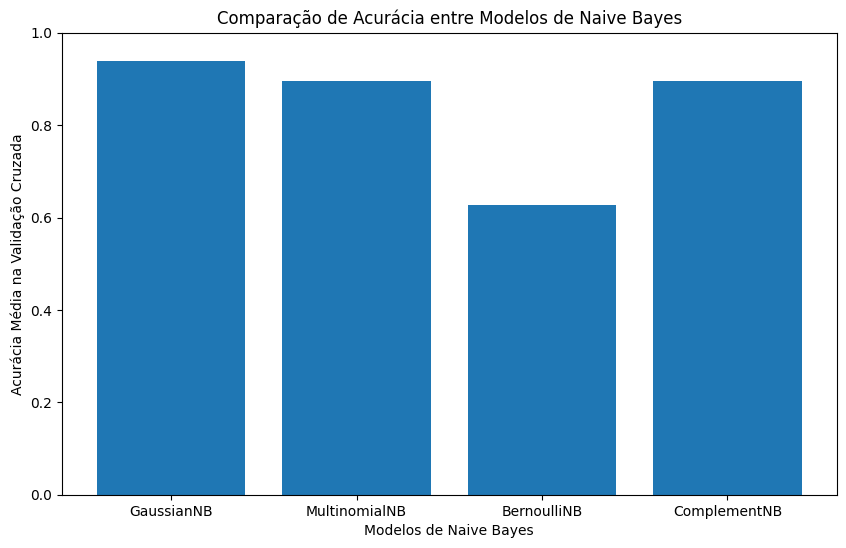

In [408]:
NV_average_accuracies = [average_accuracy_gaussian, average_accuracy_multinomial, average_accuracy_bernoulli, average_accuracy_complement]

model_names = ['GaussianNB', 'MultinomialNB', 'BernoulliNB', 'ComplementNB']

plt.figure(figsize=(10, 6))
plt.bar(model_names, NV_average_accuracies)
plt.xlabel('Modelos de Naive Bayes')
plt.ylabel('Acurácia Média na Validação Cruzada')
plt.title('Comparação de Acurácia entre Modelos de Naive Bayes')
plt.ylim(0, 1)
plt.show()

Como pudemos observar, o melhor Modelo para esse conjunto de dados foi o GaussianNB

# <a id="dtree"></a> 1.c. Decision Tree

Nesse item iremos aplicar o algoritmo de Decision Tree visto em aula. Utilizaremos alguns criterios de profundidade diferentes para comparacao.


Max Depth: 1
Acurácia média na validação cruzada: 0.8998447446048751

Max Depth: 2
Acurácia média na validação cruzada: 0.9279614966620089

Max Depth: 3
Acurácia média na validação cruzada: 0.9191119391398852

Max Depth: 4
Acurácia média na validação cruzada: 0.9208818506443098

Max Depth: 5
Acurácia média na validação cruzada: 0.91914299021891

Max Depth: 6
Acurácia média na validação cruzada: 0.9208818506443098

Max Depth: 7
Acurácia média na validação cruzada: 0.9191119391398852


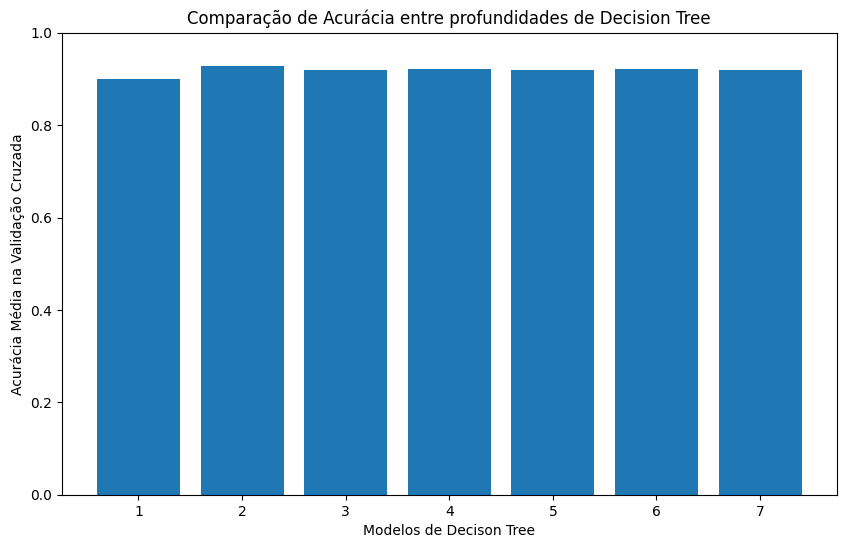

In [409]:
# Valores diferentes para max_depth
max_depth_values = range(1,8)
DT_average_accuracies = []
# Loop para testar diferentes valores de max_depth
for max_depth in max_depth_values:
    # Criando o modelo de árvore de decisão com max_depth
    decision_tree_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

    # Aplicando k-fold cross-validation
    cv_scores = cross_val_score(decision_tree_model, X, y, cv=5)

    # Exibindo as acurácias em cada fold e a acurácia média
    print(f"\nMax Depth: {max_depth}")
    average_accuracy = cv_scores.mean()
    DT_average_accuracies.append(average_accuracy)
    print(f'Acurácia média na validação cruzada: {average_accuracy}')

model_names = max_depth_values

plt.figure(figsize=(10, 6))
plt.bar(model_names, DT_average_accuracies)
plt.xlabel('Modelos de Decison Tree')
plt.ylabel('Acurácia Média na Validação Cruzada')
plt.title('Comparação de Acurácia entre profundidades de Decision Tree')
plt.ylim(0, 1)
plt.show()

Em geral nao tivemo grandes diferencas de acuracia entre os niveis de profundidade. Porem o com profundidade 2 foi o que deu a melhor media.

# <a id="prepro"></a> 1.d. Pre-processamento dos Dados

Faremos agora um pre-processamento dos dados para utilizar em futuras analises.

Inicialmente vamos verificar os dados ausentes.

In [410]:
null_values = X.isnull().sum()
null_values

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

Nao possuimos itens ausentes, podemos prosseguir para remocao de Outliers IQR conforme apresentado na aula 2.

In [411]:
len_antes = len(X)

Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

mask_outliers = ((X >= limite_inferior) & (X <= limite_superior)).all(axis=1)

X_no_out = X[mask_outliers]
y_no_out = y[mask_outliers]

removidas = len(X) - len(X_no_out)


len_depois = len(X_no_out)
removidas = len_antes - len_depois
print(f"{removidas} linhas removidas.")

171 linhas removidas.


Aplicando o metodo IQR de remocao de Outliers removemos 171 linhas. Passamos agora para uma normalizacao.

In [412]:
scaler = MinMaxScaler()
X_no_out_norma = scaler.fit_transform(X_no_out)

Vale observar que foram feitos testes utilizando PCA, porem os valores de acuracia obtidos nao foram satisfatorios, logo essa correcao nao foi aplicada no codigo final.

# <a id="preknn"></a> 1.e. KNN Pre-processado

Vamos rodar novamente os modelos porem com os dados que foram pre-processados.

Acurácia média para k=1: 0.9401785714285713
Acurácia média para k=2: 0.9433531746031747
Acurácia média para k=3: 0.9496527777777779
Acurácia média para k=4: 0.9527777777777778
Acurácia média para k=5: 0.9527777777777778
Acurácia média para k=6: 0.943452380952381
Acurácia média para k=7: 0.9402777777777779
Acurácia média para k=8: 0.9371527777777778
Acurácia média para k=9: 0.9402777777777779
Acurácia média para k=10: 0.9402281746031745
Acurácia média na validação cruzada: 0.9402281746031745
O valor de K com a maior acurácia é: 4 de 0.9527777777777778


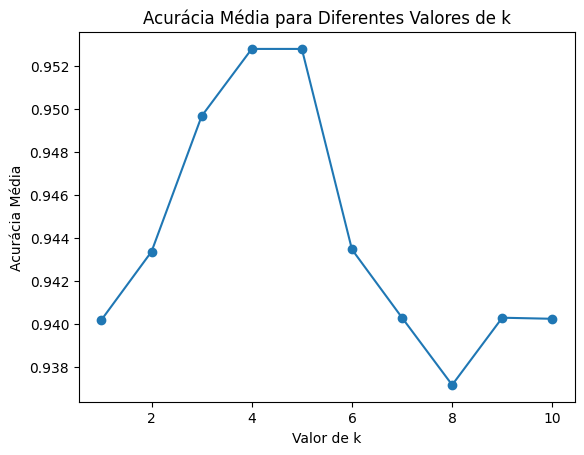

In [413]:
# Dividindo o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_no_out_norma, y_no_out, test_size=0.2, random_state=42)

# Listas para armazenar os resultados
k_values = list(range(1, 11))
PRE_KNN_accuracy_values = []

# Variação do valor de k de 1 a 10
for k_value in k_values:
    # Criando o modelo KNN
    knn_model = KNeighborsClassifier(n_neighbors=k_value)

    # Aplicando validação cruzada
    cross_val_scores = cross_val_score(knn_model, X_train, np.ravel(y_train), cv=5)

    # Calculando a acurácia média para o valor atual de k
    accuracy = cross_val_scores.mean()
    PRE_KNN_accuracy_values.append(accuracy)

    # Exibindo a acurácia média para k
    print(f'Acurácia média para k={k_value}: {accuracy}')

# Exibindo a acurácia média durante a validação cruzada
print(f'Acurácia média na validação cruzada: {cross_val_scores.mean()}')
max_accuracy= PRE_KNN_accuracy_values.index(max(PRE_KNN_accuracy_values))
best_k = k_values[max_accuracy]
best_accuracy = max(PRE_KNN_accuracy_values)

print(f"O valor de K com a maior acurácia é: {best_k} de {best_accuracy}")

# Criando o gráfico
plt.plot(k_values, PRE_KNN_accuracy_values, marker='o')
plt.title('Acurácia Média para Diferentes Valores de k')
plt.xlabel('Valor de k')
plt.ylabel('Acurácia Média')
plt.show()


Percebe-se que o pre-processamento dos dados aumentou um pouco a acuracia do modelo, anteriormente estavamos com 0.92, com essa preparacao chegamos a 0.95.

# <a id="prenaive"></a> 1.f. Naive  Bayes Pre-processado

Vamos rodar novamente os modelos porem com os dados que foram pre-processados.

In [414]:
gaussian_naive_bayes_model = GaussianNB()
multinomial_naive_bayes_model = MultinomialNB()
bernoulli_naive_bayes_model = BernoulliNB()
complement_naive_bayes_model = ComplementNB()


cv_scores_gaussian = cross_val_score(gaussian_naive_bayes_model, X_no_out_norma, np.ravel(y_no_out), cv=5)
cv_scores_multinomial = cross_val_score(multinomial_naive_bayes_model, X_no_out_norma, np.ravel(y_no_out), cv=5)
cv_scores_bernoulli = cross_val_score(bernoulli_naive_bayes_model, X_no_out_norma, np.ravel(y_no_out), cv=5)
cv_scores_complement = cross_val_score(complement_naive_bayes_model, X_no_out_norma, np.ravel(y_no_out), cv=5)

average_accuracy_gaussian = cv_scores_gaussian.mean()
average_accuracy_multinomial = cv_scores_multinomial.mean()
average_accuracy_bernoulli = cv_scores_bernoulli.mean()
average_accuracy_complement= cv_scores_complement.mean()


print(f'Acurácia média na validação cruzada (GaussianNB): {average_accuracy_gaussian}')
print(f'Acurácia média na validação cruzada (MultinomialNB): {average_accuracy_multinomial}')
print(f'Acurácia média na validação cruzada (BernoulliNB): {average_accuracy_bernoulli}')
print(f'Acurácia média na validação cruzada (ComplementNB): {average_accuracy_complement}')


Acurácia média na validação cruzada (GaussianNB): 0.9346835443037975
Acurácia média na validação cruzada (MultinomialNB): 0.8318037974683545
Acurácia média na validação cruzada (BernoulliNB): 0.7462974683544303
Acurácia média na validação cruzada (ComplementNB): 0.8163607594936708


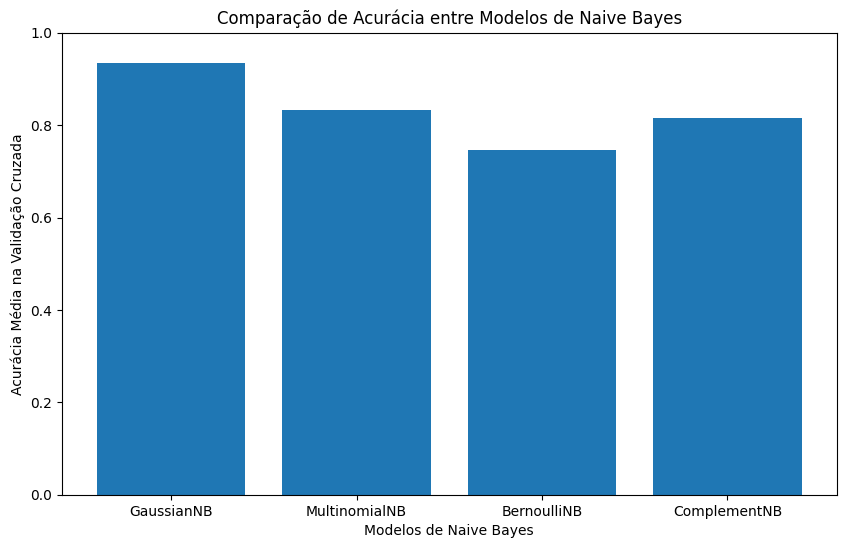

In [415]:
PRE_NV_average_accuracies = [average_accuracy_gaussian, average_accuracy_multinomial, average_accuracy_bernoulli, average_accuracy_complement]

model_names = ['GaussianNB', 'MultinomialNB', 'BernoulliNB', 'ComplementNB']

plt.figure(figsize=(10, 6))
plt.bar(model_names, PRE_NV_average_accuracies)
plt.xlabel('Modelos de Naive Bayes')
plt.ylabel('Acurácia Média na Validação Cruzada')
plt.title('Comparação de Acurácia entre Modelos de Naive Bayes')
plt.ylim(0, 1)
plt.show()

Nao tivemos um ganho significativo em alguns metodos, porem o Bernoulli teve um grande ganho de 0,63 para 0,75.

# <a id="predtree"></a> 1.g. Decision Tree Pre-processado

Vamos rodar novamente os modelos porem com os dados que foram pre-processados.


Max Depth: 1
Acurácia média na validação cruzada: 0.8918987341772151

Max Depth: 2
Acurácia média na validação cruzada: 0.9171835443037974

Max Depth: 3
Acurácia média na validação cruzada: 0.9347468354430379

Max Depth: 4
Acurácia média na validação cruzada: 0.9322784810126581

Max Depth: 5
Acurácia média na validação cruzada: 0.9272784810126582

Max Depth: 6
Acurácia média na validação cruzada: 0.9323101265822784



Max Depth: 7
Acurácia média na validação cruzada: 0.9323101265822784


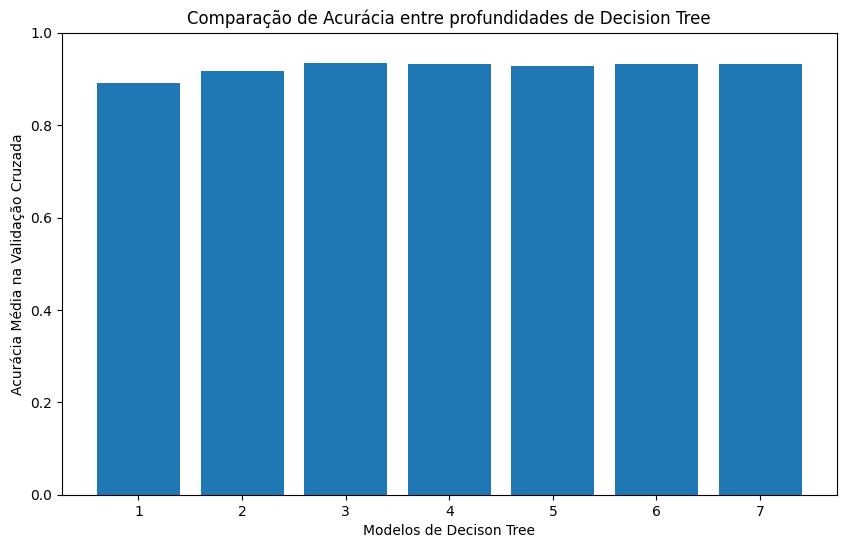

In [416]:
# Valores diferentes para max_depth
max_depth_values = range(1,8)
PRE_DT_average_accuracies = []
# Loop para testar diferentes valores de max_depth
for max_depth in max_depth_values:
    # Criando o modelo de árvore de decisão com max_depth
    decision_tree_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    # Aplicando k-fold cross-validation
    cv_scores = cross_val_score(decision_tree_model, X_no_out_norma, y_no_out, cv=5)

    # Exibindo as acurácias em cada fold e a acurácia média
    print(f"\nMax Depth: {max_depth}")
    average_accuracy = cv_scores.mean()
    PRE_DT_average_accuracies.append(average_accuracy)
    print(f'Acurácia média na validação cruzada: {average_accuracy}')

model_names = max_depth_values

plt.figure(figsize=(10, 6))
plt.bar(model_names, PRE_DT_average_accuracies)
plt.xlabel('Modelos de Decison Tree')
plt.ylabel('Acurácia Média na Validação Cruzada')
plt.title('Comparação de Acurácia entre profundidades de Decision Tree')
plt.ylim(0, 1)
plt.show()

Nesse algoritmo tambem tivemos pouco diferenca entre os dados processados ou nao, passamos da ordem de 0.92 para 0.93.

# <a id="resultados"></a> 1.h. Comparando Resultados

Vamos pegar o melhor caso de cada tipo de Modelo para verificar se o pre-processamento de dados nesse caso se torna relevante!

In [417]:
acuracias = [
    max(KNN_accuracy_values),
    max(PRE_KNN_accuracy_values),
    max(NV_average_accuracies),
    max(PRE_NV_average_accuracies),
    max(DT_average_accuracies),
    max(PRE_DT_average_accuracies),
]

legendas = [
    "KNN Raw",
    "KNN Pre-Proc.",
    "NV Raw",
    "NV Pre-Proc.",
    "DT Raw",
    "DT Pre-Proc.",
]

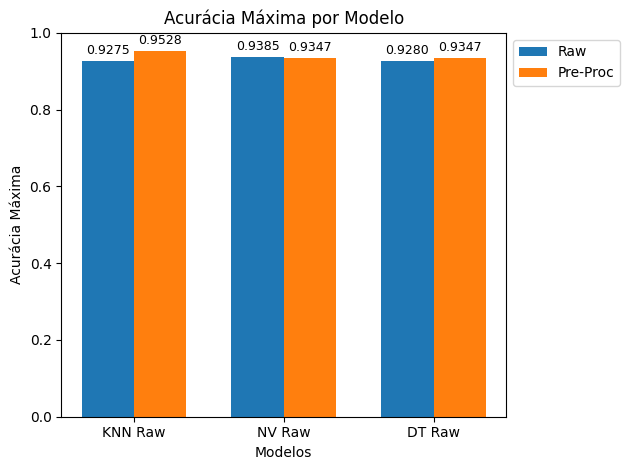

In [418]:
raw_acuracias = acuracias[::2]
pre_proc_acuracias = acuracias[1::2]
posicoes = np.arange(len(legendas) // 2)
largura = 0.35
fig, ax = plt.subplots()
barras_raw = ax.bar(posicoes, raw_acuracias, largura, label='Raw')
barras_pre_proc = ax.bar(posicoes + largura, pre_proc_acuracias, largura, label='Pre-Proc')
for i, valor in enumerate(raw_acuracias):
    ax.text(i, valor + 0.01, f'{valor:.4f}', ha='center', va='bottom', fontsize=9)

for i, valor in enumerate(pre_proc_acuracias):
    ax.text(i + largura, valor + 0.01, f'{valor:.4f}', ha='center', va='bottom', fontsize=9)
ax.set_xlabel('Modelos')
ax.set_ylabel('Acurácia Máxima')
ax.set_title('Acurácia Máxima por Modelo')
ax.set_xticks(posicoes + largura / 2)
ax.set_xticklabels(legendas[::2])
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

Tivemos uma melhoria ate aque significativa ao fazer o pre-processamento. Para trabalhos futuros ao inves de remover outliers seria importante tentar substituir por valores para verificar se surge alguma melhoria.

# <a id="difdt"></a> 2. Diferenças entre Algoritmos de Decision Tree

* Hunt (1ª geração):

    - Algoritmo original de árvore de decisão.
    - Usa divisão baseada em critérios heurísticos.



* ID3 (Iterative Dichotomiser 3):

    - Evolução do Hunt.
    - Usa ganho de informação para divisão.
    - Lida apenas com atributos categóricos.
    - Tende a criar árvores profundas.



* C4.5 (Successor of ID3):

    - Evolução do ID3.
    - Usa razão de ganho para divisão.
    - Lida com atributos categóricos e contínuos.
    - Gera árvores mais equilibradas.



* J48 (versão Java do C4.5):

    - Implementação Java do C4.5.



* C5.0 (Sucessor do C4.5):

    - Versão mais recente do C4.5.
    - Melhor desempenho e suporte a atributos contínuos.



* CART (Classification and Regression Trees):

    - Usado para classificação e regressão.
    - Usa Gini impurity para classificação e erro quadrático médio para regressão.
    - Cria árvores binárias.



* Random Forest:

    - Técnica que usa várias árvores de decisão.
    - Cada árvore é construída com amostras e recursos aleatórios.
    - Previsões são combinadas usando votação (classificação) ou média (regressão).